In [19]:
import numpy as np
import random


random.seed(30)
numpy.random.seed(seed=30)

print(random.randint(0,100))



#function that models the problem
def fitness_function(position):
    return position[0]**2 + position[1]**2 + 1


#function that models the problem
def fitness_function(position):
    A = 10
    f = 0
    for j in range(2):
        f = f + position[j]**2 + A*np.cos(2*np.pi*position[j])
        f = A*j + f
    return f
#     return position[0]**2 + position[1]**2 + 1



#Some variables to calculate the velocity
W = 0.5
c1 = 0.015
c2 = 0.09
target = 0


n_iterations = 1000
target_error = 1e-6

# create population
n_dim = 2
n_particles = 500

# particle_position_vector = np.random.rand(n_particles, n_dim)*16

particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*5, (-1)**(bool(random.getrandbits(1))) * random.random()*5]) for _ in range(n_particles)])
particle_position_vector
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = float('inf')
gbest_position = np.array([float('inf'), float('inf')])

list_gbest_pos = []
list_gbest_val = []
list_fit_cand = []

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0

position_history = dict([(key, []) for key in range(n_particles)])

# for i in range(n_particles):
        
#         position_history[i].append(particle_position_vector[i])
        
# position_history        

while iteration < n_iterations:
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        
        list_fit_cand.append(fitness_cadidate)
        
#         print(fitness_cadidate, ' ', particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value > fitness_cadidate):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
            
            best_particle = i
            
    list_gbest_pos.append(gbest_position)
    list_gbest_val.append(gbest_fitness_value)

    if(abs(gbest_fitness_value - target) < target_error):
        break
    
    for i in range(n_particles):
                
        new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
        
        position_history[i].append(new_position)


    iteration = iteration + 1
    
#     print('Iteration:', iteration)
    
# print("The best position is ", gbest_position, "in iteration number ", iteration)
print("The best position is ", gbest_position, "in iteration number ", iteration, " with particle ", best_particle)



69
The best position is  [0.49747963 0.49747963] in iteration number  1000  with particle  414


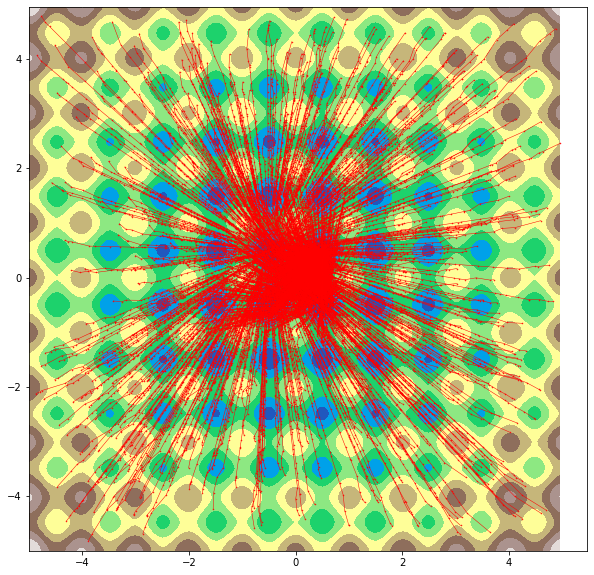

In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import cm

a = np.array(position_history[2])
b = np.array(position_history[0])


delta = .05
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = fitness_function([X,Y])
# Z1 = (X**2 + Y**2 + 1)


fig, ax = plt.subplots(figsize=(10,10))
cmap = cm.get_cmap(name='terrain', lut=None)
# cmap = cm.get_cmap(name='viridis', lut=None)
# ax.tricontourf(tri_refi, z_test_refi, levels=levels, cmap=cmap)

CS = ax.contourf(X, Y, Z1, 8, cmap=cmap)
# ax.clabel(CS, inline=1, fontsize=10)
# ax.set_title('Simplest default with labels')

plt.plot(0,0, 'bx', markersize=14)#,color=colors.pop())


for data_dict in position_history.values():

        a = np.array(data_dict)

        x1 = a[:i,0]
        y1 = a[:i,1]
        
#         xls.append(x1)
#         yls.append(y1)
        
        dots1, = ax.plot(a[:,0], a[:,1], 'r-o', lw=0.5, markersize=0.5)



In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


a = np.array(position_history[2])
b = np.array(position_history[0])


delta = .05
x = np.arange(-23.0, 23.0, delta)
y = np.arange(-20.0, 20.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = (X**2 + Y**2 + 1)


fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z1, 16)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

plt.plot(0,0, 'bx', markersize=4)#,color=colors.pop())

# dots1, = plt.scatter([],[])
dots1, = ax.plot([], [], 'r-o', markersize=1.5)
# dots2, = ax.plot([], [], 'b-o', markersize=3)

# initialization function: plot the background of each frame
def init():
    dots1.set_data([], [])
    return (dots1,)

a = np.array(position_history[best_particle])

# animation function. This is called sequentially
def animate(i):
    
    x1 = a[:i,0]
    y1 = a[:i,1]
    
    dots1.set_data(x1, y1)
        
    return (dots1,)
    
    
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(n_iterations), interval=50, blit=True)






In [ ]:
a

In [ ]:
HTML(anim.to_html5_video())

In [ ]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


a = np.array(position_history[2])
b = np.array(position_history[0])


delta = .05
x = np.arange(-23.0, 23.0, delta)
y = np.arange(-20.0, 20.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = (X**2 + Y**2 + 1)


fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z1, 16)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

# dots1, = plt.scatter([],[])
dots1, = ax.plot([], [], 'r-o', markersize=1.5)
# dots2, = ax.plot([], [], 'b-o', markersize=3)

# initialization function: plot the background of each frame
def init():
    dots1.set_data([], [])
    return (dots1,)


# animation function. This is called sequentially
def animate(i):
    xls = []
    yls = []
    for data_dict in position_history.values():

        a = np.array(data_dict)

        x1 = a[:i,0]
        y1 = a[:i,1]
        
        xls.append(x1)
        yls.append(y1)

#         plt.scatter(x1,y1, s=3)#,color=colors.pop())
    
    dots1.set_data(xls, yls)
        
    return (dots1,)
    
    
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(n_iterations), interval=50, blit=True)



plt.plot(0,0, 'rx', markersize=4)#,color=colors.pop())

# xls = []
# yls = []
# for data_dict in position_history.values():

#     a = np.array(data_dict)

#     x1 = a[:,0]
#     y1 = a[:,1]

# #     xls.append(x1)
# #     yls.append(y1)

#     plt.scatter(x1,y1, s=4)#,color=colors.pop())

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


a = np.array(position_history[2])
b = np.array(position_history[0])


delta = .05
x = np.arange(-23.0, 23.0, delta)
y = np.arange(-20.0, 20.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = (X**2 + Y**2 + 1)


fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z1, 16)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')


dots1, = ax.plot([], [], 'r-o', markersize=3)
dots2, = ax.plot([], [], 'b-o', markersize=3)

# initialization function: plot the background of each frame
def init():
    dots.set_data([], [])
    return (dots,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    
    
    
    x1 = a[:i,0]
    y1 = a[:i,1]
    
    x2 = b[:i,0]
    y2 = b[:i,1]
    
    dots1.set_data(x1, y1)
    dots2.set_data(x2, y2)
#     ax.plot(a[i,0], a[i,1],'ro')
    return (dots1,dots2,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)

In [ ]:

position_history.keys()

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
np.shape(a)

In [ ]:
a = np.array(position_history[2])
a[:5]


In [ ]:
import matplotlib.pyplot as plt

# d ={'5000cca234c1c445': {382877: 7, 382919: 3},
# '5000cca234c94a2e': {382873: 1, 382886: 1},
# '5000cca234c89421': {383173: 1, 383183: 2, 382917: 1, 382911: 1},
# '5000cca234c5d43a': {382889: 1, 382915: 1, 382917: 8},
# '5000cca234c56488': {382909: 2, 382911: 5}}

# colors = list("rgbcmyk")

for data_dict in position_history.values():
    
    a = np.array(data_dict)
    
#     print(data_dict)
    
    x = a[:,0]
    y = a[:,1]
    
    plt.scatter(x,y)#,color=colors.pop())

plt.legend(position_history.keys())
plt.show()


# plt.plot(a[:6,0], a[:6,1], 'ro-', markersize=3)

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


a = np.array(position_history[2])
b = np.array(position_history[0])


delta = .05
x = np.arange(-23.0, 23.0, delta)
y = np.arange(-20.0, 20.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = (X**2 + Y**2 + 1)


fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z1, 16)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

# dots1, = plt.scatter([],[])
dots1, = ax.plot([], [], 'ro', markersize=1.5)
# dots2, = ax.plot([], [], 'b-o', markersize=3)

# initialization function: plot the background of each frame
def init():
    dots1.set_data([], [])
    return (dots1,)


# animation function. This is called sequentially
def animate(i):
    xls = []
    yls = []
    for data_dict in position_history.values():

        a = np.array(data_dict)

        x1 = a[:i,0]
        y1 = a[:i,1]
        
        xls.append(x1)
        yls.append(y1)

        plt.scatter(x1,y1, s=3)#,color=colors.pop())
    
#     dots1.set_data(xls, yls)
        
    return (dots1,)
    
    
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)

HTML(anim.to_html5_video())

In [ ]:
import random
import numpy as np 

#function that models the problem
def fitness_function(position):
    return position[0]**2 + position[1]**2 + 1

#Some variables to calculate the velocity
W = 0.5
c1 = 0.5
c2 = 0.9
target = 1

# n_iterations = int(input("Inform the number of iterations: "))
# target_error = float(input("Inform the target error: "))
# n_particles = int(input("Inform the number of particles: "))

n_iterations = 10
target_error = 1e-5
n_particles = 10


particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = float('inf')
gbest_position = np.array([float('inf'), float('inf')])

list_gbest_pos = []
list_gbest_val = []
list_fit_cand = []

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0

while iteration < n_iterations:
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        
        list_fit_cand.append(fitness_cadidate)
        
        print(fitness_cadidate, ' ', particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value > fitness_cadidate):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
            
    list_gbest_pos.append(gbest_position)
    list_gbest_val.append(gbest_fitness_value)

    if(abs(gbest_fitness_value - target) < target_error):
        break
    
    for i in range(n_particles):
        new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position

    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number ", iteration)

In [ ]:
import matplotlib.pyplot as plt

# list_gbest_pos = np.concatenate(list_gbest_pos)
list_fit_cand

plt.plot(list_fit_cand)

